In [1]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)
from razdel import tokenize
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

In [3]:
def create_dataframe(matrix, tokens):

    doc_names = [f'doc_{i}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

In [4]:
def Doc_func(text, segmenter=segmenter, morph_tagger=morph_tagger):
    doc_temp = Doc(text)
    doc_temp.segment(segmenter)
    doc_temp.tag_morph(morph_tagger)
    for token in doc_temp.tokens:
        token.lemmatize(morph_vocab)
    return ' '.join([
        #_.pos + "," +
        #_.text:
        _.lemma for _ in doc_temp.tokens if _.pos not in  ['PUNCT', 'ADP', 'CCONJ', 'PRON', 'SYM', 'SCONJ', 'DET', 'NUM']])

In [5]:
df = pd.read_excel("RPD_output/dataset.xlsx")

In [6]:
df['Doc'] = df['content'].apply(Doc_func)
df

,path_name,file_name,text_raw,title,content,Doc
0,C:\Users\seismopro\source\RPD_source\01_Форма_...,01_Форма_РП_дисциплины (1),МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Тестирование информационных систем,Основные виды учебной деятельности Разделы ди...,основной вид учебный деятельность раздел дисци...
1,C:\Users\seismopro\source\RPD_source\2023 РПД ...,2023 РПД Информационные технологии в цифровой ...,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Информационные технологии в цифровой среде,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...
2,C:\Users\seismopro\source\RPD_source\ИСИС РПД.pdf,ИСИС РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Инструментальные средства информационных систем,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...
3,C:\Users\seismopro\source\RPD_source\КИС РПД.pdf,КИС РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Корпоративные информационные системы и разрабо...,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...
4,C:\Users\seismopro\source\RPD_source\Методы и ...,Методы и средства разработки информационных си...,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Методы и средства разработки информационных си...,Основные виды учебной деятельности Формируемый...,основной вид учебный деятельность формировать ...
5,C:\Users\seismopro\source\RPD_source\Построени...,Построение выводов по данным РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Анализ данных в управлении предприятием,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...
6,C:\Users\seismopro\source\RPD_source\Проектиро...,Проектирование и разработка ИС РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Проектирование и разработка информационных систем,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...
7,C:\Users\seismopro\source\RPD_source\Разработк...,Разработка Web-приложений РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Разработка Web-приложений,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...
8,C:\Users\seismopro\source\RPD_source\РП МО.pdf,РП МО,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Машинное обучение,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...
9,C:\Users\seismopro\source\RPD_source\РП_Интелл...,РП_Интеллект_сист_и_ техн_ 2021,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Интеллектуальные системы и технологии,(модуля) Разделы дисциплины Формируемый Виды ...,модуль раздел дисциплина формировать вид учебн...


In [7]:
df.to_excel(r'RPD_output/dataset_res.xlsx')
#ngram_range=(1, 2)

In [8]:
tfidf_vect = TfidfVectorizer()
tfidf_matrix = tfidf_vect.fit_transform(df['Doc'])
feature_names = tfidf_vect.get_feature_names_out()

list_output1 = []
for i in range(len(tfidf_matrix.toarray())):
    tfidf_scores = tfidf_matrix.toarray()[i]
    sorted_features = [list(filter(lambda c: c[0] > 0.02, sorted(zip(tfidf_scores, feature_names), reverse=True)))]
    list_output1.append(sorted_features)

In [9]:
list_output1

[[[(0.7123051000391216, 'тестирование'),
   (0.3131286909278714, 'качество'),
   (0.2427340614416097, 'оценка'),
   (0.205066130394563, 'по'),
   (0.17338147245829263, 'стратегия'),
   (0.1471150465233071, 'требование'),
   (0.12952335830194292, 'регрессионный'),
   (0.12952335830194292, 'выявление'),
   (0.11715448097725788, 'удобство'),
   (0.11715448097725788, 'гостр'),
   (0.11693533446400077, 'раздел'),
   (0.09771832685461287, 'документирование'),
   (0.0938854470527703, 'формирование'),
   (0.0938854470527703, 'реализация'),
   (0.0938854470527703, 'обеспечение'),
   (0.08826902791398425, 'программный'),
   (0.08434033550744596, 'основа'),
   (0.0820264521578252, 'код'),
   (0.07828217273196784, 'рассматриваться'),
   (0.07828217273196784, 'проверка'),
   (0.07010110791673389, 'вид'),
   (0.06918221424828824, 'лабораторный'),
   (0.059700263801428136, 'лекция'),
   (0.05857724048862894, 'специализированный'),
   (0.05857724048862894, 'ретроспектива'),
   (0.05857724048862894, 'о

In [10]:
df.insert(6, "key_words", list_output1)

In [11]:
df

,path_name,file_name,text_raw,title,content,Doc,key_words
0,C:\Users\seismopro\source\RPD_source\01_Форма_...,01_Форма_РП_дисциплины (1),МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Тестирование информационных систем,Основные виды учебной деятельности Разделы ди...,основной вид учебный деятельность раздел дисци...,"[[(0.7123051000391216, тестирование), (0.31312..."
1,C:\Users\seismopro\source\RPD_source\2023 РПД ...,2023 РПД Информационные технологии в цифровой ...,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Информационные технологии в цифровой среде,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...,"[[(0.4435061200375566, графика), (0.3167900857..."
2,C:\Users\seismopro\source\RPD_source\ИСИС РПД.pdf,ИСИС РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Инструментальные средства информационных систем,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...,"[[(0.5049171995399959, иса), (0.25288410499165..."
3,C:\Users\seismopro\source\RPD_source\КИС РПД.pdf,КИС РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Корпоративные информационные системы и разрабо...,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...,"[[(0.6164326599303754, киса), (0.3108961811159..."
4,C:\Users\seismopro\source\RPD_source\Методы и ...,Методы и средства разработки информационных си...,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Методы и средства разработки информационных си...,Основные виды учебной деятельности Формируемый...,основной вид учебный деятельность формировать ...,"[[(0.26375290422819037, проектирование), (0.23..."
5,C:\Users\seismopro\source\RPD_source\Построени...,Построение выводов по данным РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Анализ данных в управлении предприятием,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...,"[[(0.365212955687669, предприятие), (0.2569413..."
6,C:\Users\seismopro\source\RPD_source\Проектиро...,Проектирование и разработка ИС РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Проектирование и разработка информационных систем,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...,"[[(0.39160946233737115, проектирование), (0.28..."
7,C:\Users\seismopro\source\RPD_source\Разработк...,Разработка Web-приложений РПД,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Разработка Web-приложений,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...,"[[(0.7834617991754058, javascript), (0.3215589..."
8,C:\Users\seismopro\source\RPD_source\РП МО.pdf,РП МО,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Машинное обучение,Основные виды учебной деятельности Формируемы...,основной вид учебный деятельность формировать ...,"[[(0.5965895084953636, нейронный), (0.43972750..."
9,C:\Users\seismopro\source\RPD_source\РП_Интелл...,РП_Интеллект_сист_и_ техн_ 2021,МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИ...,Интеллектуальные системы и технологии,(модуля) Разделы дисциплины Формируемый Виды ...,модуль раздел дисциплина формировать вид учебн...,"[[(0.41176812938608615, экспертный), (0.334015..."


In [12]:
df.to_excel(r'RPD_output/dataset_res2.xlsx')

# Косинусное расстояние

In [13]:
tfidf_vect2 = TfidfVectorizer()
tfidf_matrix2 = tfidf_vect2.fit_transform(df['Doc'])
feature_names2 = tfidf_vect2.get_feature_names_out()

list_output2 = []
for i in range(len(tfidf_matrix2.toarray())):
    tfidf_scores2 = tfidf_matrix2.toarray()[i]
    sorted_features2 = [feature for _, feature in list(filter(lambda c: c[0] > 0.1, sorted(zip(tfidf_scores2, feature_names2), reverse=True)))]
    list_output2.append(sorted_features2)

In [14]:
list_output3 = []
for elem in list_output2:
    list_output3.append(" ".join(elem))

In [15]:
tfidf_vect3 = TfidfVectorizer()
tfidf_matrix3 = tfidf_vect3.fit_transform(list_output3)
feature_names3 = tfidf_vect3.get_feature_names_out()

In [16]:
cosine_similarity_matrix  = cosine_similarity(tfidf_matrix3)
create_dataframe(tfidf_matrix3.toarray(), feature_names3)

,20,and,business,career,continuous,directum,educational,engineering,framework,html,...,эмп,эмпирический,эргономика,эргономический,этап,этика,это,эффективность,ядерный,язык
doc_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_2,0.000000,0.000000,0.281521,0.000000,0.000000,0.281521,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.407646,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.340017
doc_8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
doc_names_list = [f'doc_{i}' for i, _ in enumerate(cosine_similarity_matrix)]

In [18]:
dataframe_hm = create_dataframe(cosine_similarity_matrix, doc_names_list)

<AxesSubplot:>

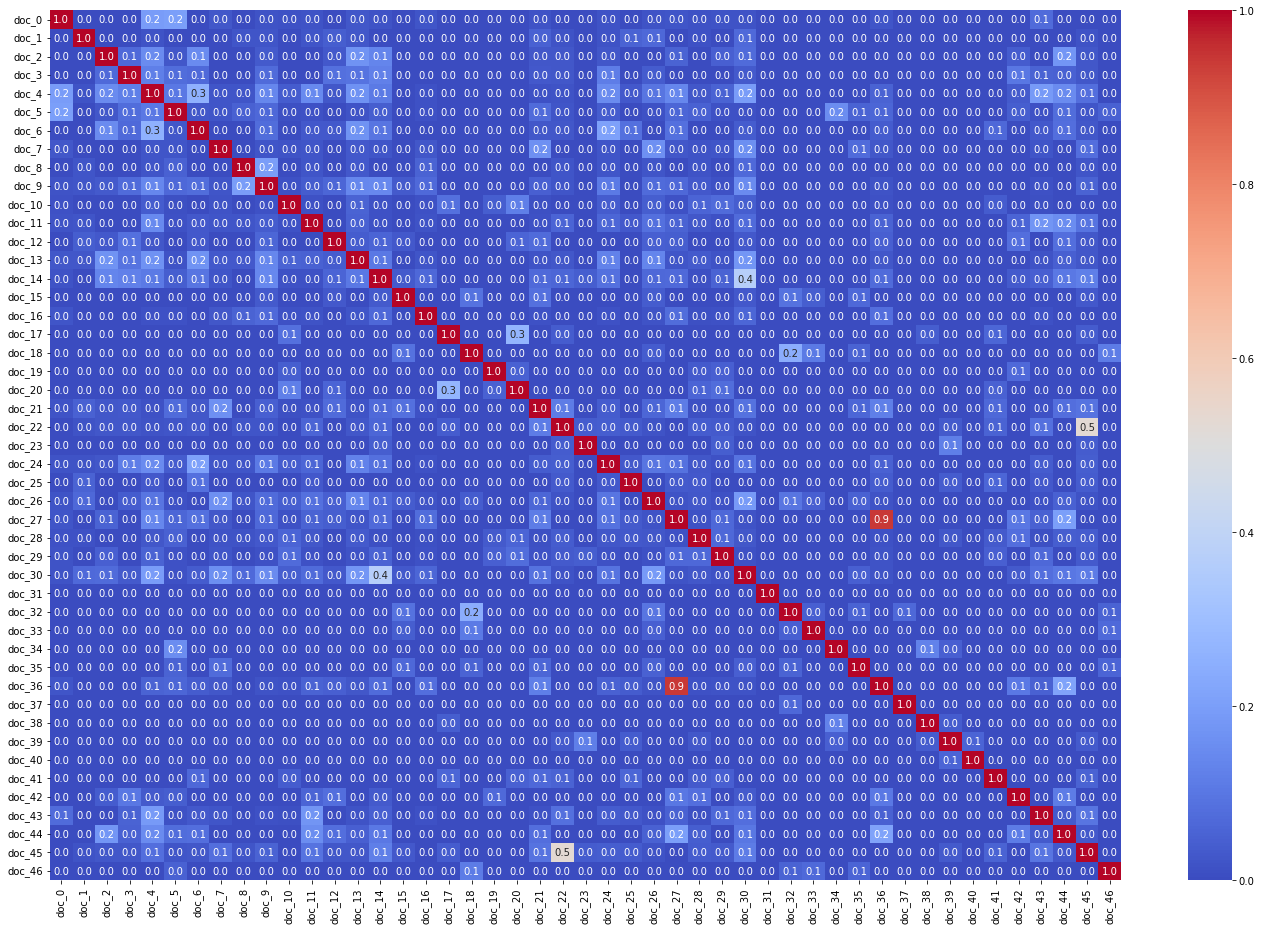

In [19]:
plt.figure(figsize = (24,16))
sns.heatmap(dataframe_hm, cmap="coolwarm", annot=True, fmt=".1f") 
#, annot= True,fmt=".1f"

Датасет из Роснавыка

In [20]:
df_rn_raw = pd.read_excel("rosnavik/dataset.xlsx")

In [21]:
df_rn = df_rn_raw[df_rn_raw['Ключевые навыки'].notnull()]
df_rn = df_rn[['Специализация', 'Ключевые навыки']]
df_rn

,Специализация,Ключевые навыки
6,"Программист, разработчик",HTML/CSS;HTML/CSS;HTML/CSS;Javascript;Javascri...
12,"Программист, разработчик",Знание базовых принципов разработки
14,"Программист, разработчик",1С: Бухгалтерия;1С: Предприятие;1С: Предприяти...
22,"Программист, разработчик",Javascript
23,"Программист, разработчик",Знание английского языка;Ответственность и про...
...,...,...
55743,Финансовый менеджер,Microsoft Excel;Ведение отчетности;Проведение ...
55746,Финансовый менеджер,Аналитическое мышление;Бюджетирование;Бюджетир...
55749,Финансовый менеджер,Работа с поставщиками;Финансовый анализ;Налого...
55750,Финансовый менеджер,Клиент-Банк;Ведение бухгалтерского учета;Веден...


In [22]:
df_rn['Ключевые навыки'].str.replace(';',' ') 

6        HTML/CSS HTML/CSS HTML/CSS Javascript Javascri...
12                     Знание базовых принципов разработки
14       1С: Бухгалтерия 1С: Предприятие 1С: Предприяти...
22                                              Javascript
23       Знание английского языка Ответственность и про...
                               ...                        
55743    Microsoft Excel Ведение отчетности Проведение ...
55746    Аналитическое мышление Бюджетирование Бюджетир...
55749    Работа с поставщиками Финансовый анализ Налого...
55750    Клиент-Банк Ведение бухгалтерского учета Веден...
55751    Microsoft PowerPoint Анализ данных Анализ фина...
Name: Ключевые навыки, Length: 33181, dtype: object

In [23]:
df_rn['Ключевые навыки+'] = df_rn['Ключевые навыки'].apply(Doc_func)

In [24]:
df_rn

,Специализация,Ключевые навыки,Ключевые навыки+
6,"Программист, разработчик",HTML/CSS;HTML/CSS;HTML/CSS;Javascript;Javascri...,html css html css html css javascript javascri...
12,"Программист, разработчик",Знание базовых принципов разработки,знание базовый принцип разработка
14,"Программист, разработчик",1С: Бухгалтерия;1С: Предприятие;1С: Предприяти...,с бухгалтерия с предприятие с предприятие упра...
22,"Программист, разработчик",Javascript,javascript
23,"Программист, разработчик",Знание английского языка;Ответственность и про...,знание английский язык ответственность проакти...
...,...,...,...
55743,Финансовый менеджер,Microsoft Excel;Ведение отчетности;Проведение ...,microsoft excel ведение отчетность проведение ...
55746,Финансовый менеджер,Аналитическое мышление;Бюджетирование;Бюджетир...,аналитический мышление бюджетирование бюджетир...
55749,Финансовый менеджер,Работа с поставщиками;Финансовый анализ;Налого...,работа поставщик финансовый анализ налоговый у...
55750,Финансовый менеджер,Клиент-Банк;Ведение бухгалтерского учета;Веден...,клиент-банк ведение бухгалтерский учет ведение...


In [25]:
df_rn = df_rn[['Специализация', 'Ключевые навыки+']]

In [26]:
df_rn = df_rn.groupby('Специализация', as_index = False).agg({'Ключевые навыки+': ','.join})
df_rn

,Специализация,Ключевые навыки+
0,"BI-аналитик, аналитик данных; Маркетолог-анали...",применение метод itsm microsoft sql server зна...
1,Аналитик,microsoft excel python sql sql целеустремленно...
2,Бизнес-аналитик,bpmn работа crm-система directum rx применение...
3,Бизнес-тренер,обучаемость адаптивность коучинг проведение тр...
4,Менеджер продукта,продажа публичный выступление проведение презе...
5,"Оператор ПК, оператор базы данных",ответственность проактивность самоорганизованн...
6,"Программист, разработчик",html css html css html css javascript javascri...
7,Системный аналитик,bpmn javascript api sql uml управление база да...
8,Финансовый менеджер,разработка программный обеспечение microsoft o...


In [27]:
tfidf_vect_rn = TfidfVectorizer()
tfidf_matrix_rn = tfidf_vect_rn.fit_transform(df_rn['Ключевые навыки+'])
feature_names_rn = tfidf_vect_rn.get_feature_names_out()

list_output_rn = []
for i in range(len(tfidf_matrix_rn.toarray())):
    tfidf_scores_rn = tfidf_matrix_rn.toarray()[i]
    sorted_features_rn = [feature for _, feature in list(filter(lambda c: c[0] > 0.01, sorted(zip(tfidf_scores_rn, feature_names_rn), reverse=True)))]
    list_output_rn.append(sorted_features_rn)

In [28]:
df_rn.insert(2, "key_words", list_output_rn)
df_rn

,Специализация,Ключевые навыки+,key_words
0,"BI-аналитик, аналитик данных; Маркетолог-анали...",применение метод itsm microsoft sql server зна...,"[анализ, microsoft, управление, данные, финанс..."
1,Аналитик,microsoft excel python sql sql целеустремленно...,"[управление, анализ, microsoft, данные, грамот..."
2,Бизнес-аналитик,bpmn работа crm-система directum rx применение...,"[управление, бизнес, разработка, процесс, bi, ..."
3,Бизнес-тренер,обучаемость адаптивность коучинг проведение тр...,"[проведение, тренинг, коучинг, продажа, обучае..."
4,Менеджер продукта,продажа публичный выступление проведение презе...,"[управление, продукт, грамотность, анализ, про..."
5,"Оператор ПК, оператор базы данных",ответственность проактивность самоорганизованн...,"[ведение, грамотность, документооборот, базовы..."
6,"Программист, разработчик",html css html css html css javascript javascri...,"[javascript, разработка, scala, kotlin, java, ..."
7,Системный аналитик,bpmn javascript api sql uml управление база да...,"[управление, api, sql, bpmn, анализ, uml, разр..."
8,Финансовый менеджер,разработка программный обеспечение microsoft o...,"[ведение, финансовый, отчетность, анализ, упра..."


In [29]:
df_rn.to_excel(r'RPD_output\dataset_res3.xlsx')

In [70]:
list_output_rn_1 = []
for elem in list_output_rn:
    list_output_rn_1.append(" ".join(elem))
list_output_rn_1, len(list_output_rn_1)

(['анализ microsoft управление данные финансовый sql грамотность проведение bi мышление знание ведение разработка работа аналитический маркетинговый python исследование отчетность инвестиционный продажа информационный power проект excel область маркетинг основа коммуникативный рынок база бюджетирование стратегия научно исследовательский powerpoint среда конкурентный процесс бизнес язык английский управленческий организация маркетплейс server персонал лидерство хозяйственный финансово бренд создание риск ценообразование оптимизация деятельность обработка учет статистический презентационный материал google tableau apache экономический система продукт тестирование поисковый seo навык сайт публичный презентация выступление базовый финансирование postgresql продвижение операция финансы ассортимент etl моделирование организаторский системный технический бухгалтерский команда analytics sap clickhouse социальный проектный сеть визуализация клиент рекламный веб многозадачность аналитика оценка 

In [71]:
list_output3

['тестирование качество оценка по стратегия требование регрессионный выявление удобство гостр раздел',
 'графика растровый слой работа дизайн цвет безье векторный текст файл цветокоррекция цветовой кривой коллаж верстка корректировать основа примитив компьютерный',
 'иса информационный интеграция конфигурирование studio business система directum понятие экспорт проект внедрение импорт данные настройка ит',
 'киса корпоративный данные управление планирование хранилище создание предприятие предъявлять ресурс база план система лабораторный',
 'проектирование разработка система по фаза тестирование промышленный лабораторный серверный понятие работа раздел модель лекция проект управление программный качество иса жизненный диаграмма транзакция специфика конфигурация',
 'предприятие анализ метод аб оценка данные гипотеза качество машинный доверительный интервал регрессия тестирование критерий раздел нейронный корреляция классификация ход доля',
 'проектирование транзакция иса бд модель данные

In [72]:
list_one = list_output_rn_1
list_two = list_output3

In [73]:
list_one.extend(list_two)

In [74]:
list_one

['анализ microsoft управление данные финансовый sql грамотность проведение bi мышление знание ведение разработка работа аналитический маркетинговый python исследование отчетность инвестиционный продажа информационный power проект excel область маркетинг основа коммуникативный рынок база бюджетирование стратегия научно исследовательский powerpoint среда конкурентный процесс бизнес язык английский управленческий организация маркетплейс server персонал лидерство хозяйственный финансово бренд создание риск ценообразование оптимизация деятельность обработка учет статистический презентационный материал google tableau apache экономический система продукт тестирование поисковый seo навык сайт публичный презентация выступление базовый финансирование postgresql продвижение операция финансы ассортимент etl моделирование организаторский системный технический бухгалтерский команда analytics sap clickhouse социальный проектный сеть визуализация клиент рекламный веб многозадачность аналитика оценка q

In [75]:
tfidf_vect_final = TfidfVectorizer()
tfidf_matrix_final = tfidf_vect_final.fit_transform(list_one)
feature_names_final = tfidf_vect_final.get_feature_names_out()
cosine_similarity_matrix_final  = cosine_similarity(tfidf_matrix_final)
create_dataframe(tfidf_matrix_final.toarray(), feature_names_final)


,20,access,analytics,and,android,apache,api,applications,back,basic,...,эмп,эмпирический,эргономика,эргономический,этап,этика,это,эффективность,ядерный,язык
doc_0,0.000000,0.000000,0.109181,0.000000,0.00000,0.095042,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070809
doc_1,0.000000,0.119723,0.108563,0.000000,0.00000,0.094504,0.094504,0.119723,0.00000,0.119723,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070408
doc_2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.119632,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089129
doc_3,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.107329
doc_4,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080916
doc_5,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc_6,0.000000,0.000000,0.000000,0.000000,0.12219,0.096451,0.096451,0.000000,0.12219,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071859
doc_7,0.000000,0.000000,0.000000,0.000000,0.00000,0.123154,0.123154,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091754
doc_8,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089415
doc_9,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [76]:
doc_names_list_final = [f'doc_{i}' for i, _ in enumerate(cosine_similarity_matrix_final)]


In [78]:
dataframe_hm_final = create_dataframe(cosine_similarity_matrix_final, doc_names_list_final)

In [79]:
dataframe_hm_final.head(9)

,doc_0,doc_1,doc_2,doc_3,doc_4,doc_5,doc_6,doc_7,doc_8,doc_9,...,doc_46,doc_47,doc_48,doc_49,doc_50,doc_51,doc_52,doc_53,doc_54,doc_55
doc_0,1.000000,0.662400,0.499540,0.324490,0.531975,0.217309,0.240258,0.365382,0.485265,0.076737,...,0.0,0.000000,0.013047,0.0,0.0,0.022770,0.057579,0.101797,0.081366,0.000000
doc_1,0.662400,1.000000,0.730279,0.349882,0.560275,0.286488,0.290021,0.580132,0.385811,0.042991,...,0.0,0.000000,0.012973,0.0,0.0,0.022641,0.077565,0.101221,0.080906,0.000000
doc_2,0.499540,0.730279,1.000000,0.364349,0.513694,0.280720,0.266822,0.627298,0.361660,0.054422,...,0.0,0.000000,0.000000,0.0,0.0,0.028661,0.098188,0.104441,0.062751,0.000000
doc_3,0.324490,0.349882,0.364349,1.000000,0.453222,0.330060,0.162279,0.191599,0.310790,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.034514,0.066007,0.061780,0.064435,0.000000
doc_4,0.531975,0.560275,0.513694,0.453222,1.000000,0.287326,0.180414,0.321071,0.383732,0.053458,...,0.0,0.000000,0.014909,0.0,0.0,0.026020,0.065798,0.126477,0.090773,0.023801
doc_5,0.217309,0.286488,0.280720,0.330060,0.287326,1.000000,0.124276,0.144062,0.281387,0.000000,...,0.0,0.028981,0.000000,0.0,0.0,0.000000,0.045739,0.031655,0.017947,0.000000
doc_6,0.240258,0.290021,0.266822,0.162279,0.180414,0.124276,1.000000,0.469151,0.155647,0.017074,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.096028,0.019168,0.037770,0.000000
doc_7,0.365382,0.580132,0.627298,0.191599,0.321071,0.144062,0.469151,1.000000,0.231228,0.056025,...,0.0,0.000000,0.000000,0.0,0.0,0.029505,0.127548,0.088830,0.028532,0.000000
doc_8,0.485265,0.385811,0.361660,0.310790,0.383732,0.281387,0.155647,0.231228,1.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.061524,0.054990,0.068355,0.048956,0.000000


<AxesSubplot:>

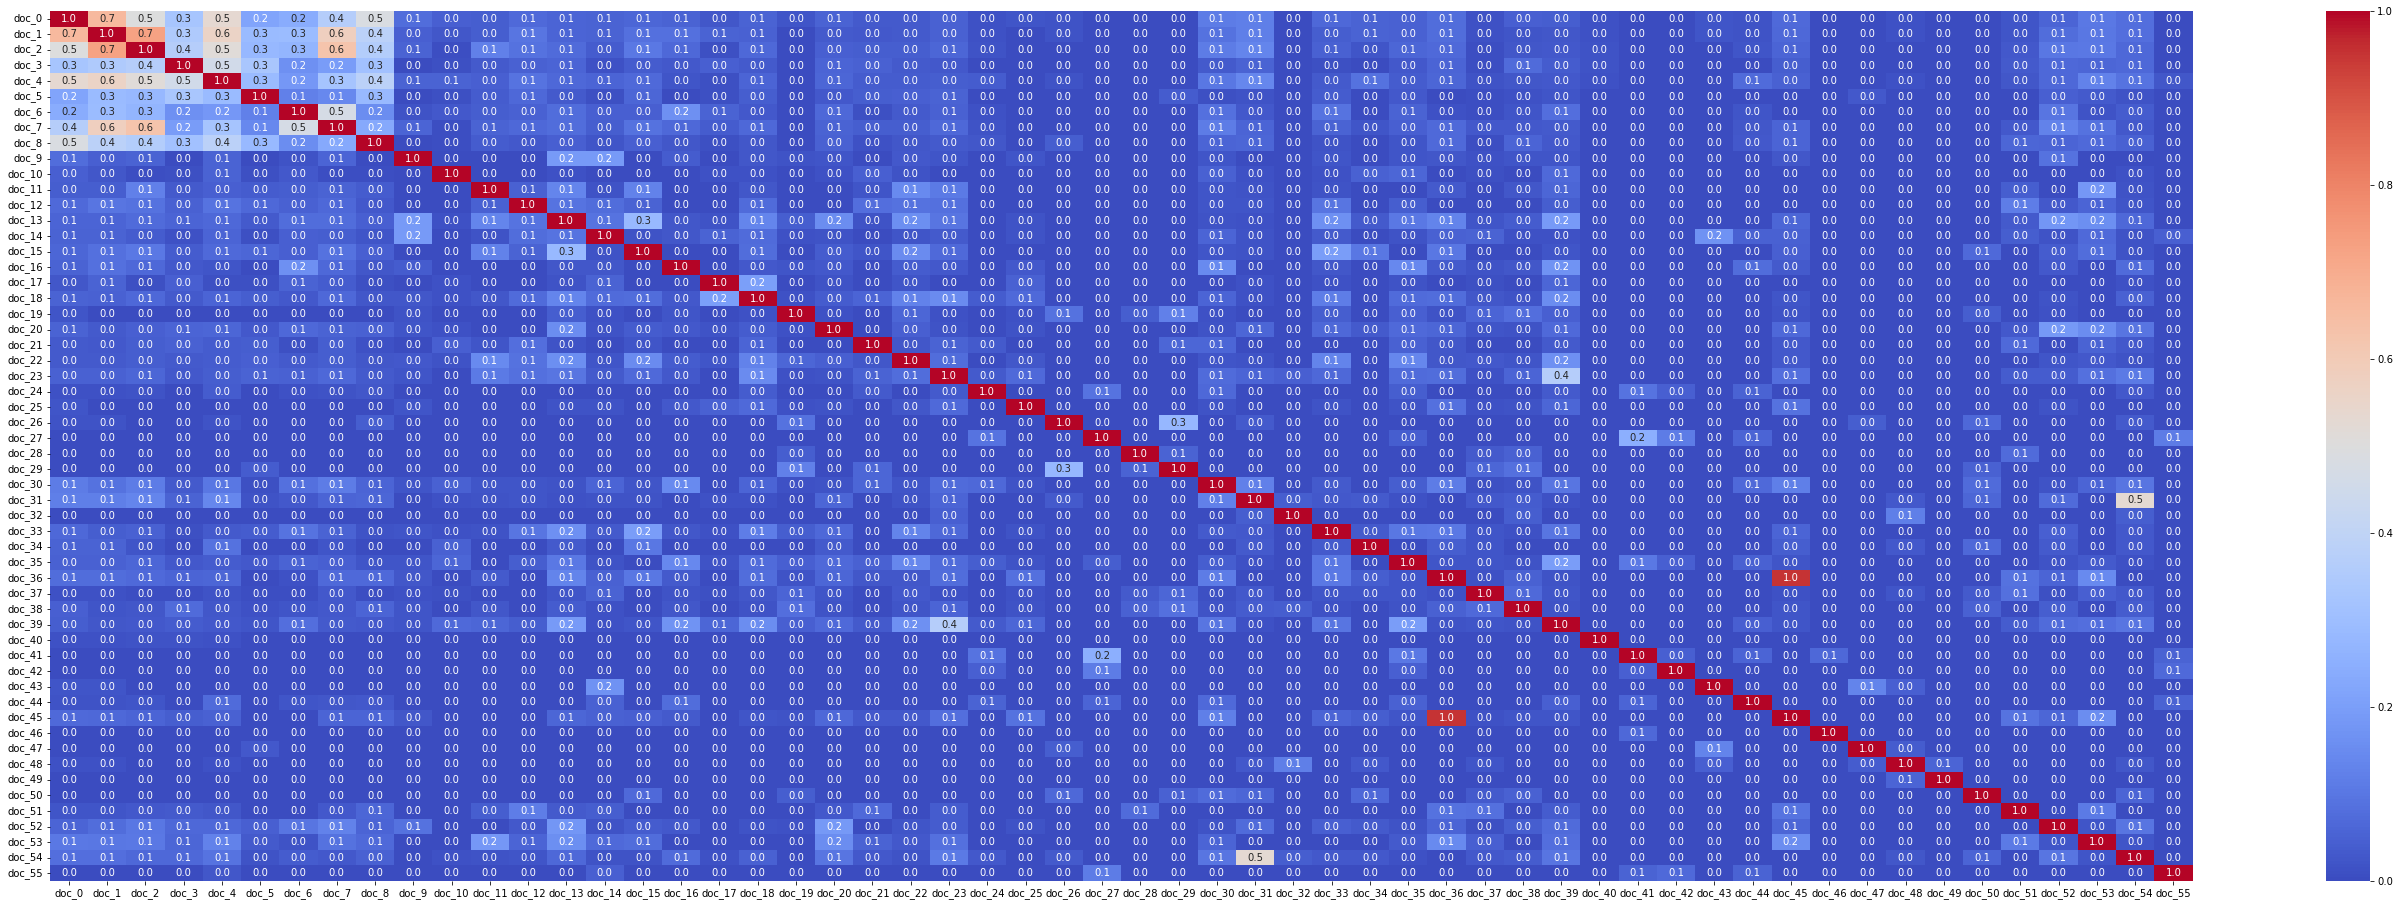

In [81]:
plt.figure(figsize = (48,16))
sns.heatmap(dataframe_hm_final , cmap="coolwarm", annot=True, fmt=".1f") 
#, annot= True,fmt=".1f"